### **Dataset açıklaması**

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

### **Gerekli kütüphaneler**


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

### **EDA**

In [6]:
# Veri setlerini yükle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4976,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10888,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10889,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10890,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10891,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10892,4,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Columns: 785 entries, label to pixel783
dtypes: float64(206), int64(579)
memory usage: 65.2 MB


In [10]:
train_data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **feature engineering**

In [12]:
train_data.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,1
pixel780,1
pixel781,1
pixel782,1


In [13]:

# Boşlukları 0 ile doldurma
train_data.fillna(0, inplace=True)


In [14]:
train_data.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


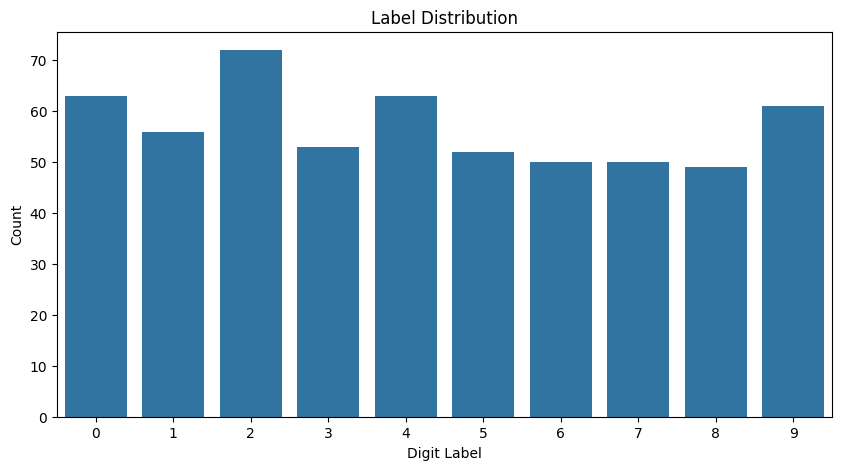

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=train_data)
plt.title('Label Distribution')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()


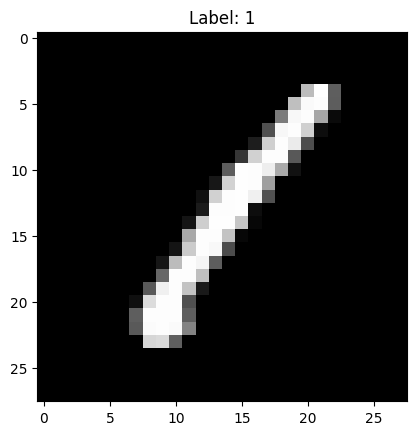

In [ ]:

digit = train_data.iloc[0, 1:]  # İlk satırı (label hariç) al
digit_image = digit.values.reshape(28, 28)  # 28x28 matrise dönüştür

plt.imshow(digit_image, cmap='gray')
plt.title(f"Label: {train_data.iloc[0, 0]}")
plt.show()




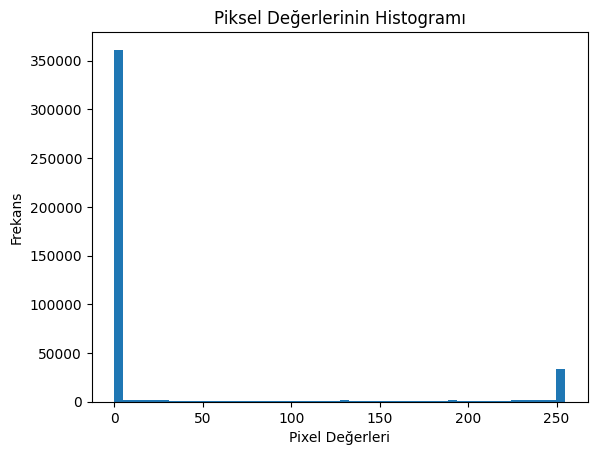

In [ ]:

# Histogram ile piksel değerlerini göster
plt.hist(train_data.iloc[:, 1:].values.flatten(), bins=50)
plt.xlabel('Pixel Değerleri')
plt.ylabel('Frekans')
plt.title('Piksel Değerlerinin Histogramı')
plt.show()


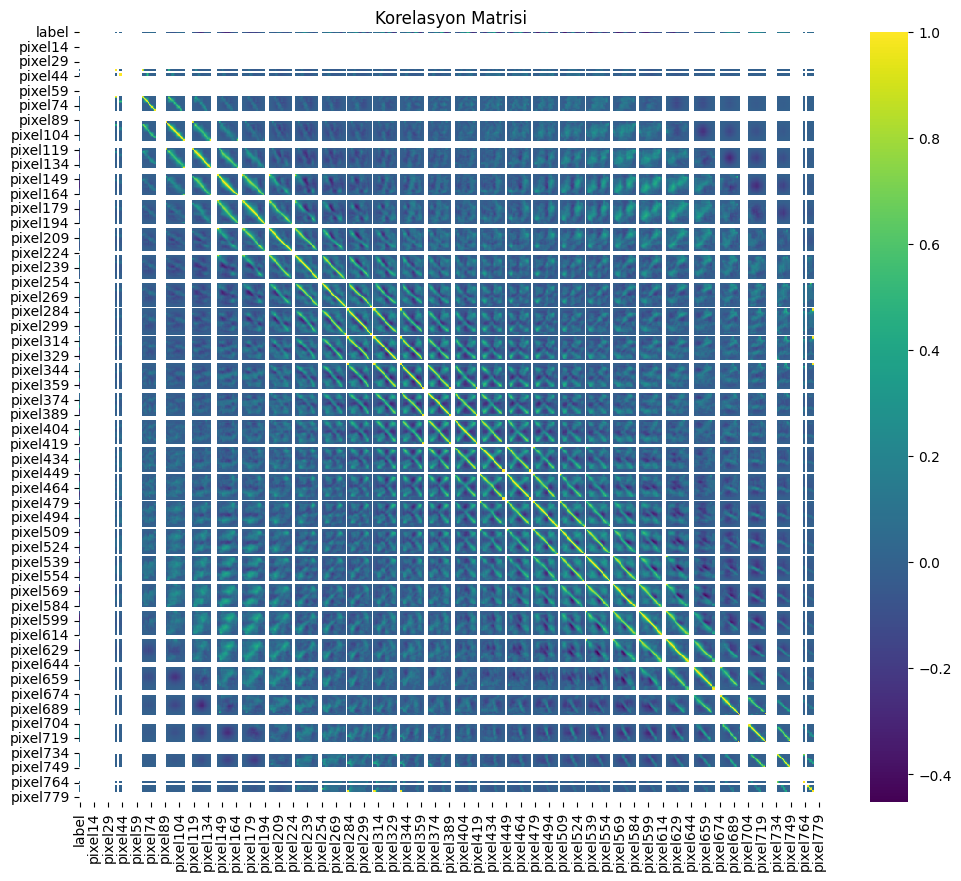

In [ ]:
# Korelasyon matrisini görselleştir
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


In [15]:
# Özellikler ve etiketleri ayırma
X = train_data.drop('label', axis=1).values  # Özellikler (pikseller)
y = train_data['label'].values                 # Etiketler (rakamlar)

In [16]:
X = X / 255.0 #Normalizasyon

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **Modelleme**

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # Giriş katmanı
model.add(Dense(64, activation='relu'))                        # Gizli katman
model.add(Dense(10, activation='softmax'))                     # Çıkış katmanı (0-9 arası rakamlar)

In [3]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7167 - loss: 0.9587 - val_accuracy: 0.9036 - val_loss: 0.3169
Epoch 2/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2352 - val_accuracy: 0.9289 - val_loss: 0.2243
Epoch 3/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1598 - val_accuracy: 0.9284 - val_loss: 0.2115
Epoch 4/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9659 - loss: 0.1119 - val_accuracy: 0.9495 - val_loss: 0.1708
Epoch 5/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0766 - val_accuracy: 0.9509 - val_loss: 0.1542
Epoch 6/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0534 - val_accuracy: 0.9463 - val_loss: 0.1605
Epoch 7/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0490 - val_accuracy: 0.9514 - val_loss: 0.1600
Epoch 8/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0301 - val_accuracy: 0.9477 - v

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


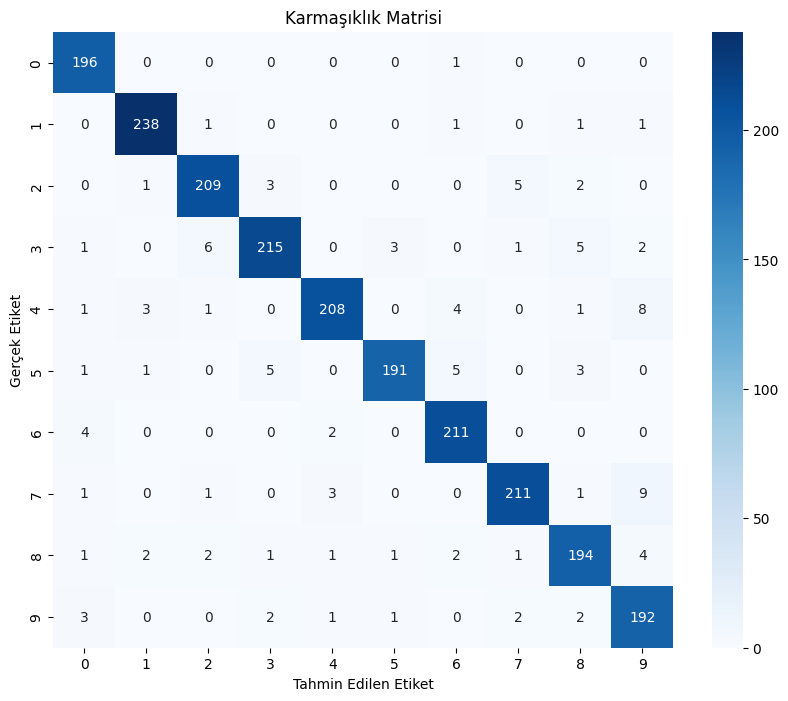

In [20]:

from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

# Model tahminlerini al
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Karmaşıklık matrisini oluştur
cm = confusion_matrix(y_val, y_pred_classes)

# Isı haritası ile karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Doğruluk: {accuracy * 100:.2f}%')

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.1037
Doğruluk: 97.21%


Test Verileri ile Tahmin

In [ ]:
X_test = test_data.values / 255.0
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)

CNN ile modelleme

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))  # Giriş katmanı
model.add(Reshape(target_shape=(28, 28, 1)))  # Görüntüleri 4D forma çevirme
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))  # Konvolüsyonel katman
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling katmanı
model.add(Flatten())  # Verileri tek boyutlu hale getirme
model.add(Dense(10, activation='softmax'))  # Çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=8, batch_size=32, validation_data=(X_val.reshape(-1, 28, 28, 1), y_val))

Epoch 1/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8347 - loss: 0.5978 - val_accuracy: 0.9425 - val_loss: 0.1987
Epoch 2/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9487 - loss: 0.1795 - val_accuracy: 0.9624 - val_loss: 0.1328
Epoch 3/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9634 - loss: 0.1254 - val_accuracy: 0.9690 - val_loss: 0.1097
Epoch 4/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9745 - loss: 0.0940 - val_accuracy: 0.9723 - val_loss: 0.0969
Epoch 5/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9754 - loss: 0.0816 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 6/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9811 - loss: 0.0650 - val_accuracy: 0.9742 - val_loss: 0.0815
Epoch 7/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9823 - loss: 0.0604 - val_accuracy: 0.9758 - val_loss: 0.0781
Epoch 8/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9847 - loss: 0

In [25]:
X_test = test_data.values / 255.0
predictions = model.predict(X_test.reshape(-1, 28, 28, 1))
predicted_labels = np.argmax(predictions, axis=1)

342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


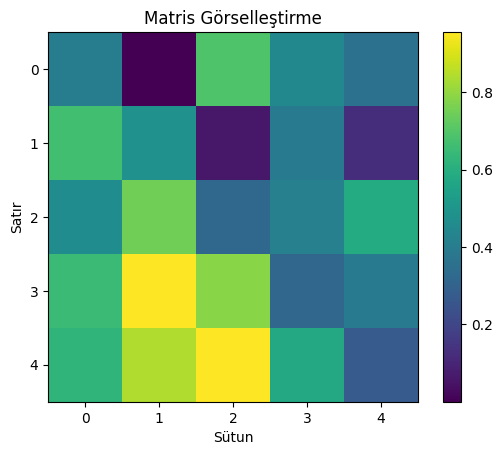

In [21]:


# Örnek bir matris oluştur (değerleri değiştirebilirsiniz)
matrix = np.random.rand(5, 5)  # 5x5 boyutunda rastgele değerlerle bir matris

# Matrisi çizdirme
plt.imshow(matrix, cmap='viridis')  # 'viridis' renk haritasını kullanabilirsiniz
plt.colorbar()  # Renk çubuğunu gösterir
plt.title('Matris Görselleştirme')
plt.xlabel('Sütun')
plt.ylabel('Satır')
plt.show()


In [26]:
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('submissionCNN.csv', index=False)